In [1]:
import pandas as pd

# import csv

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [21]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# data exploration

### checking out calendar ID column, comfrim that it represents each day in the data set; date cooresponds to last 4 digits of the ID

In [3]:
wego['CALENDAR_ID'].value_counts().sort_index()

CALENDAR_ID
120230801    6461
120230802    6450
120230803    6472
120230804    6458
120230805    4164
             ... 
120230926    6499
120230927    6508
120230928    6499
120230929    6541
120230930    4158
Name: count, Length: 61, dtype: int64

In [4]:
wego['SERVICE_ABBR'].value_counts().sort_index()

SERVICE_ABBR
1    279300
2     37497
3     33532
Name: count, dtype: int64

In [5]:
wego['BLOCK_ABBR'].value_counts()

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
5094      72
8405      72
6401      72
5690      72
9975      72
Name: count, Length: 102, dtype: int64

In [6]:
wego['OPERATOR'].value_counts()

OPERATOR
2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
        ... 
2256       6
56         3
473        2
0          1
656        1
Name: count, Length: 341, dtype: int64

# Q1

### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

##### create an adherence data frame

In [7]:
adherence = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
350324,0,1,0
350325,0,1,0
350326,0,0,1
350327,0,1,0


In [8]:
adherence[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].describe()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
count,350329.000000,350329.000000,350329.000000
mean,0.027902,0.168522,0.770841
std,0.164693,0.374329,0.420292
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [9]:
adherence['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    340554
1      9775
Name: count, dtype: int64

In [10]:
adherence['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    291291
1     59038
Name: count, dtype: int64

In [11]:
adherence['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

looking at value counts of each column above, we can see that it is counting both 1, where adherence was not met, and the 0 values where it was

In [12]:
adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,9775
1,ADJUSTED_LATE_COUNT,59038
2,ADJUSTED_ONTIME_COUNT,270048


##### Percentage of adherence on time

In [13]:
adherence['ADJUSTED_ONTIME_COUNT'].sum()/350329 * 100

77.08411236295025

In [14]:
wego['HDWY_DEV'].describe()

count    265893.000000
mean          0.518081
std           7.161798
min         -64.000000
25%          -2.316667
50%           0.033333
75%           2.483333
max         565.433333
Name: HDWY_DEV, dtype: float64

#### import numpy to create visuals representations of distributions for adherence and headway deviation

In [17]:
import numpy as np

#### visual represenation of distribution fro adherence

In [19]:
ad_mean = wego['ADHERENCE'].mean()
ad_std = np.std(wego['ADHERENCE'])

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

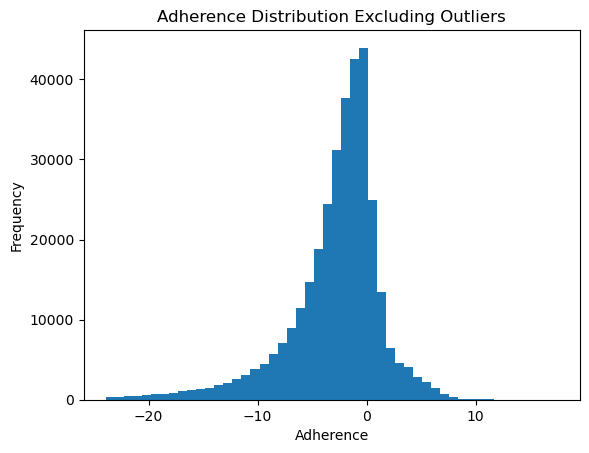

In [20]:
ax = (
    wego[wego['ADHERENCE'].between(ad_mean - ad_std*3,
                                   ad_mean + ad_std*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel='Adherence'
    )

##### visual represenation of distribution of headway deviation

In [24]:
hd_mean = wego['HDWY_DEV'].mean()
hd_std = np.std(wego['HDWY_DEV'])

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

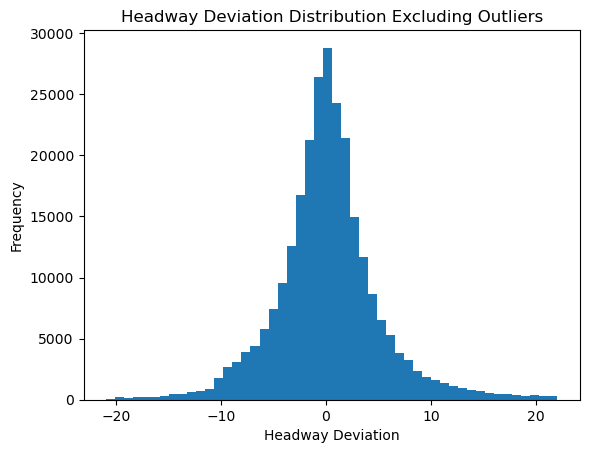

In [25]:
ax = (
    wego[wego['HDWY_DEV'].between(hd_mean - hd_std*3,
                                   hd_mean + hd_std*3,
                                   inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation'
    )

# Q2

### How does direction of travel, route, or location affect the headway and on-time performance?

In [40]:
import seaborn as sns

In [26]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

###### investigation of direction of travel

In [28]:
wego[['ROUTE_DIRECTION_NAME','ADHERENCE']]

,ROUTE_DIRECTION_NAME,ADHERENCE
0,TO DOWNTOWN,-2.133333
1,TO DOWNTOWN,-2.450000
2,TO DOWNTOWN,-0.933333
3,TO DOWNTOWN,6.283333
4,FROM DOWNTOWN,-1.583333
...,...,...
350324,TO DOWNTOWN,-8.433333
350325,TO DOWNTOWN,-11.300000
350326,FROM DOWNTOWN,-4.316666
350327,FROM DOWNTOWN,-22.083333


In [33]:
#function to call wego data based on direction

def direction(x):
    
    return wego[wego['ROUTE_DIRECTION_NAME']==x]

In [38]:
to_dt = direction('TO DOWNTOWN')

In [39]:
#data frame for trips only moving towards downtown

to_dt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN


In [43]:
#pulling only the adherence values from the to downtown dataframe
to_dt_adherence = to_dt[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [44]:
to_dt_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
7,0,0,1
...,...,...,...
350318,0,1,0
350319,0,0,0
350323,0,1,0
350324,0,1,0


In [45]:
#comparison on each adherence valuation for the to downtown data frame

to_dt_adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,4484
1,ADJUSTED_LATE_COUNT,19437
2,ADJUSTED_ONTIME_COUNT,135634


In [46]:
#### want to figure out how to plot this somehow
###sns.lineplot(data=to_dt, x=to_dt['ADHERENCE'], y=to_dt['ROUTE_DIRECTION_NAME'])

In [36]:
##data frame for trips only moving away from downtown

away_dt = direction('FROM DOWNTOWN')

In [37]:
away_dt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350322,120230930,2,100406608,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [47]:
#pulling only the adherence values from the away from downtown dataframe
away_dt_adherence = away_dt[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [48]:
away_dt_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
4,0,0,1
5,0,0,1
6,0,0,1
11,0,0,1
12,1,0,0
...,...,...,...
350321,0,0,0
350322,0,1,0
350326,0,0,1
350327,0,1,0


In [49]:
#comparison on each adherence valuation for the away from downtown data frame

away_dt_adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,5291
1,ADJUSTED_LATE_COUNT,39601
2,ADJUSTED_ONTIME_COUNT,134414


##### investigation of route

In [51]:
wego['ROUTE_ABBR'].value_counts()

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

In [50]:
#function to call wego data based on route

def route(x):
    
    return wego[wego['ROUTE_ABBR']==x]

In [52]:
r55 = route(55)

r55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3853,120230801,1,99462915,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,9.483333,NaN
3854,120230801,1,99462916,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3855,120230801,1,99462917,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3856,120230801,1,99462918,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3857,120230801,1,99462919,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349481,120230930,2,100405549,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,17.666666,2.666666,0,0,1,0,0.0,0,0.000000,NaN
349482,120230930,2,100405550,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,16.800000,1.800000,0,0,1,0,0.0,0,0.000000,NaN
349483,120230930,2,100405551,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,18.566666,3.566666,0,0,1,0,0.0,0,0.000000,NaN
349484,120230930,2,100405552,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,21.233333,7.233333,0,1,0,0,0.0,0,0.000000,NaN


In [54]:
#pulling only the adherence values from route55 dataframe
r55_adherence = r55[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r55_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
3853,0,0,1
3854,0,0,1
3855,0,0,1
3856,0,0,1
3857,0,0,1
...,...,...,...
349481,0,0,1
349482,0,0,1
349483,0,0,1
349484,0,1,0


In [55]:
#comparison on each adherence valuation for rout 55 data frame

r55_adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,1531
1,ADJUSTED_LATE_COUNT,16748
2,ADJUSTED_ONTIME_COUNT,42080


In [56]:
r56 = route(56)

r56

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
4999,120230801,1,99464095,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,46.866666,NaN
5000,120230801,1,99464096,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
5001,120230801,1,99464097,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
5002,120230801,1,99464098,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
5003,120230801,1,99464099,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,18.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,18.883333,-1.116667,0,0,1,0,0.0,0,0.000000,NaN
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,19.500000,-0.500000,0,0,1,0,0.0,0,0.000000,NaN
350108,120230930,2,100406188,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,19.333333,-0.666667,0,0,1,0,0.0,0,1.950000,NaN


In [57]:
#pulling only the adherence values from route56 dataframe
r56_adherence = r56[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r56_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
4999,0,0,1
5000,0,0,1
5001,0,0,1
5002,0,0,1
5003,0,0,1
...,...,...,...
350105,0,0,1
350106,0,0,1
350107,0,0,1
350108,0,0,1


In [58]:
#comparison on each adherence valuation for route 56 data frame

r56_adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,1752
1,ADJUSTED_LATE_COUNT,8837
2,ADJUSTED_ONTIME_COUNT,48361


In [59]:
r52 = route(52)

r52

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2900,120230801,1,99461930,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,35.433333,NaN
2901,120230801,1,99461931,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2.633333,NaN
2902,120230801,1,99461932,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2903,120230801,1,99461933,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2904,120230801,1,99461934,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348701,120230930,2,100404751,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,25.283333,-3.716667,0,1,0,0,0.0,0,0.000000,NaN
348702,120230930,2,100404752,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,24.316666,-4.683334,0,1,0,0,0.0,0,0.000000,NaN
348703,120230930,2,100404753,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,23.566666,-5.433334,0,1,0,0,0.0,0,0.000000,NaN
348704,120230930,2,100404754,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,23.150000,-3.850000,0,1,0,0,0.0,0,0.000000,NaN


In [60]:
#pulling only the adherence values from route52 dataframe
r52_adherence = r52[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r52_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2900,0,0,1
2901,0,0,1
2902,0,0,1
2903,0,0,1
2904,0,0,1
...,...,...,...
348701,0,1,0
348702,0,1,0
348703,0,1,0
348704,0,1,0


In [61]:
#comparison on each adherence valuation for route 52 data frame

r52_adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,1553
1,ADJUSTED_LATE_COUNT,10038
2,ADJUSTED_ONTIME_COUNT,37736


In [71]:
r3 = route(3)

r3

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,8.433333,NaN
1273,120230801,1,99459626,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
1274,120230801,1,99459627,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
1275,120230801,1,99459628,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
1276,120230801,1,99459629,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347535,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,25.300000,-4.700000,0,0,1,0,0.0,0,6.566666,7.0
347536,120230930,2,100403108,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,46.566666,16.566666,0,0,1,0,0.0,0,0.000000,NaN
347537,120230930,2,100403109,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,45.750000,15.750000,0,0,1,0,0.0,0,1.833333,NaN
347538,120230930,2,100403110,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,44.950000,14.950000,0,0,1,0,0.0,0,0.000000,NaN


In [75]:
#pulling only the adherence values from route3 dataframe
r3_adherence = r3[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r3_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
1272,0,0,1
1273,0,0,1
1274,0,0,1
1275,0,0,1
1276,0,0,1


In [106]:
#comparison on each adherence valuation for route 3 data frame

r3comp = r3_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r3comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1382
1,ADJUSTED_LATE_COUNT,9590
2,ADJUSTED_ONTIME_COUNT,34516


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

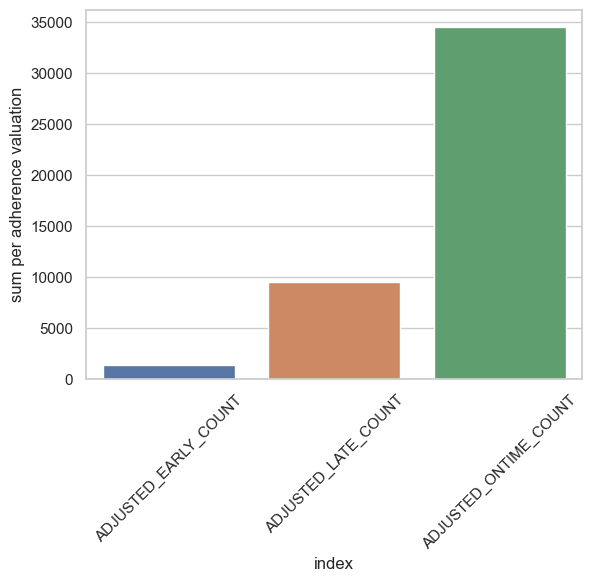

In [108]:
#create barplot
r3plot = sns.barplot(r3comp, x="index", y="sum per adherence valuation")

#rotate labels
r3plot.set_xticklabels(r3plot.get_xticklabels(), rotation=45)

In [74]:
r50 = route(50)

r50

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2126,120230801,1,99461142,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,17.483333,NaN
2127,120230801,1,99461143,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2128,120230801,1,99461144,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2129,120230801,1,99461145,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2130,120230801,1,99461146,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2.016666,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348087,120230930,2,100404125,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,39.800000,9.800000,0,1,0,0,0.0,0,0.000000,NaN
348088,120230930,2,100404126,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,38.516666,8.516666,0,1,0,0,0.0,0,0.000000,NaN
348089,120230930,2,100404127,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,37.983333,7.983333,0,1,0,0,0.0,0,0.000000,NaN
348090,120230930,2,100404128,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,37.350000,7.350000,0,1,0,0,0.0,0,0.000000,NaN


In [76]:
#pulling only the adherence values from route50 dataframe
r50_adherence = r50[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r50_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2126,0,0,1
2127,0,0,1
2128,0,0,1
2129,0,0,1
2130,0,0,1


In [104]:
#comparison on each adherence valuation for route 50 data frame

r50comp = r50_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r50comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1207
1,ADJUSTED_LATE_COUNT,5113
2,ADJUSTED_ONTIME_COUNT,36309


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

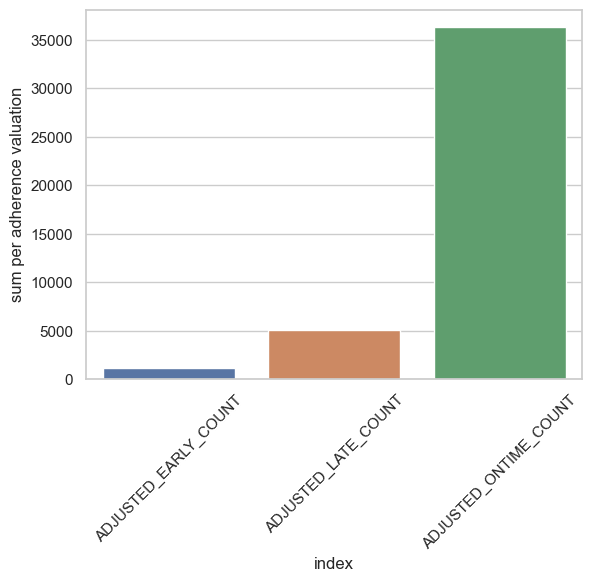

In [105]:
#create barplot
r50plot = sns.barplot(r50comp, x="index", y="sum per adherence valuation")

#rotate labels
r50plot.set_xticklabels(r50plot.get_xticklabels(), rotation=45)

In [78]:
r23 = route(23)

r23

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
491,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,17.950000,2.950000,0,0,1,0,0.0,0,12.983333,NaN
492,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,15.450000,0.450000,0,0,1,0,0.0,0,0.000000,NaN
493,120230801,1,99458393,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
494,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,25.833333,3.833333,0,1,0,0,0.0,0,14.433333,7.0
495,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,22.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346952,120230930,2,100402198,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,47.633333,22.633333,0,0,1,1,1.0,0,0.000000,NaN
346953,120230930,2,100402199,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
346954,120230930,2,100402200,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,26.266666,1.266666,0,0,1,0,0.0,0,0.000000,NaN
346955,120230930,2,100402201,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,26.183333,1.183333,0,1,0,0,0.0,0,0.000000,NaN


In [79]:
#pulling only the adherence values from route23 dataframe
r23_adherence = r23[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r23_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
491,0,0,1
492,0,0,1
493,0,0,1
494,0,1,0
495,0,0,1


In [102]:
#comparison on each adherence valuation for route 23 data frame

r23comp = r23_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r23comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1286
1,ADJUSTED_LATE_COUNT,3230
2,ADJUSTED_ONTIME_COUNT,35137


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

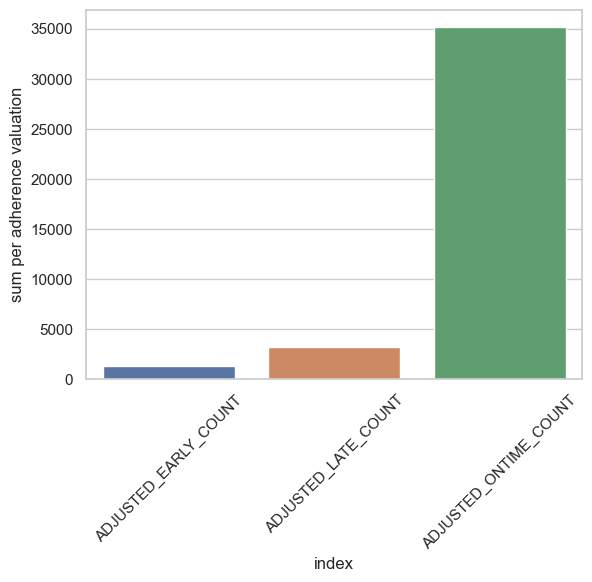

In [103]:
#create barplot
r23plot = sns.barplot(r23comp, x="index", y="sum per adherence valuation")

#rotate labels
r23plot.set_xticklabels(r23plot.get_xticklabels(), rotation=45)

In [81]:
r22 = route(22)

r22

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,23.833333,-6.166667,0,0,1,0,0.0,0,3.666666,3.0
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,18.200000,-11.800000,0,0,1,0,0.0,0,0.000000,NaN
346469,120230930,2,100401707,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,17.800000,-12.200000,1,0,0,0,0.0,0,0.000000,NaN
346470,120230930,2,100401708,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,49.800000,-10.200000,0,0,1,0,0.0,0,0.000000,NaN


In [82]:
#pulling only the adherence values from route 22 dataframe
r22_adherence = r22[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r22_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [100]:
#comparison on each adherence valuation for route 22 data frame

r22comp = r22_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r22comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,631
1,ADJUSTED_LATE_COUNT,2065
2,ADJUSTED_ONTIME_COUNT,22492


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

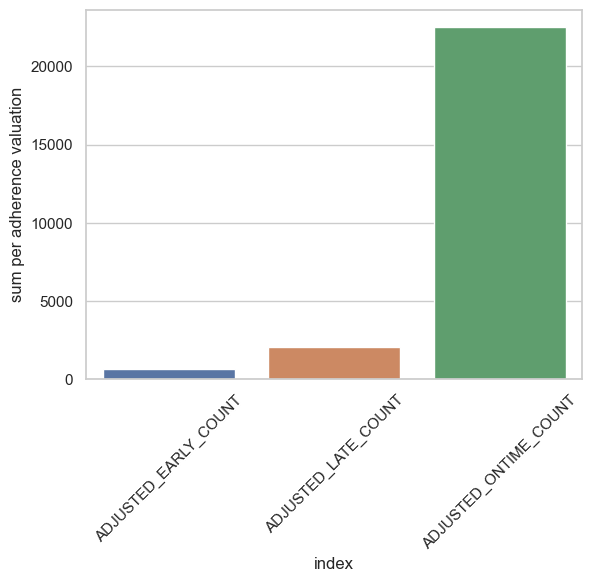

In [101]:
#create barplot
r22plot = sns.barplot(r22comp, x="index", y="sum per adherence valuation")

#rotate labels
r22plot.set_xticklabels(r22plot.get_xticklabels(), rotation=45)

In [84]:
r7 = route(7)

r7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6134,120230801,1,99465615,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
6135,120230801,1,99465616,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,...,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [85]:
#pulling only the adherence values from route 7 dataframe
r7_adherence = r7[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r7_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2123,0,0,1
2124,0,0,1
2125,0,0,1
6134,0,0,0
6135,0,0,0


In [93]:
#comparison on each adherence valuation for route 7 data frame

r7comp = r7_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r7comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,433
1,ADJUSTED_LATE_COUNT,3417
2,ADJUSTED_ONTIME_COUNT,13417


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

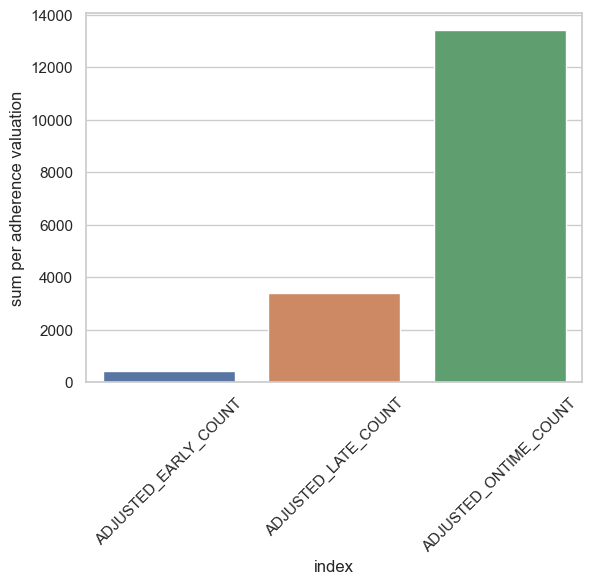

In [98]:
#create barplot
r7plot = sns.barplot(r7comp, x="index", y="sum per adherence valuation")

#rotate labels
r7plot.set_xticklabels(r7plot.get_xticklabels(), rotation=45)


#### investigation of location

In [63]:
#grouping route, direction. with mean of HDWY DEV and ADHERENCE per each

routedir_headway = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "HDWY_DEV", "ADHERENCE"]].groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).mean("HDWY_DEV", "ADHERENCE")

routedir_headway

HDWY_DEV  ADHERENCE
ROUTE_ABBR ROUTE_DIRECTION_NAME                     
3          FROM DOWNTOWN         0.636069  -4.831550
           TO DOWNTOWN           0.525802  -2.689360
7          FROM DOWNTOWN         0.379082  -4.028927
           TO DOWNTOWN           0.293108  -2.599183
22         FROM DOWNTOWN         1.088609  -2.179503
           TO DOWNTOWN           0.808517  -0.041538
23         FROM DOWNTOWN         1.063912  -2.295042
           TO DOWNTOWN           1.038711  -0.959462
50         FROM DOWNTOWN         0.222529  -2.729163
           TO DOWNTOWN           0.202238  -2.282192
52         FROM DOWNTOWN         1.238860  -5.149382
           TO DOWNTOWN           0.690182  -2.723518
55         FROM DOWNTOWN         0.264152  -5.673887
           TO DOWNTOWN           0.257969  -3.989490
56         FROM DOWNTOWN         0.158441  -3.579404
           TO DOWNTOWN           0.135393  -1.484165

In [113]:
routedir_headway['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'] = routedir_headway.index
routedir_headway

HDWY_DEV  ADHERENCE           ROUTE_ABBR  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                             
3          FROM DOWNTOWN         0.636069  -4.831550   (3, FROM DOWNTOWN)   
           TO DOWNTOWN           0.525802  -2.689360     (3, TO DOWNTOWN)   
7          FROM DOWNTOWN         0.379082  -4.028927   (7, FROM DOWNTOWN)   
           TO DOWNTOWN           0.293108  -2.599183     (7, TO DOWNTOWN)   
22         FROM DOWNTOWN         1.088609  -2.179503  (22, FROM DOWNTOWN)   
           TO DOWNTOWN           0.808517  -0.041538    (22, TO DOWNTOWN)   
23         FROM DOWNTOWN         1.063912  -2.295042  (23, FROM DOWNTOWN)   
           TO DOWNTOWN           1.038711  -0.959462    (23, TO DOWNTOWN)   
50         FROM DOWNTOWN         0.222529  -2.729163  (50, FROM DOWNTOWN)   
           TO DOWNTOWN           0.202238  -2.282192    (50, TO DOWNTOWN)   
52         FROM DOWNTOWN         1.238860  -5.149382  (52, FROM DOWNTOWN)   
           TO DOWNTOWN           0.690182  -2.723518    (52, TO DOWNTOWN)   
55         FROM DOWNTOWN         0.264152  -5.673887  (55, FROM DOWNTOWN)   
           TO DOWNTOWN           0.257969  -3.989490    (55, TO DOWNTOWN)   
56         FROM DOWNTOWN         0.158441  -3.579404  (56, FROM DOWNTOWN)   
           TO DOWNTOWN           0.135393  -1.484165    (56, TO DOWNTOWN)   

                                (ROUTE_ABBR, ROUTE_DIRECTION_NAME)  
ROUTE_ABBR ROUTE_DIRECTION_NAME                                     
3          FROM DOWNTOWN                        (3, FROM DOWNTOWN)  
           TO DOWNTOWN                            (3, TO DOWNTOWN)  
7          FROM DOWNTOWN                        (7, FROM DOWNTOWN)  
           TO DOWNTOWN                            (7, TO DOWNTOWN)  
22         FROM DOWNTOWN                       (22, FROM DOWNTOWN)  
           TO DOWNTOWN                           (22, TO DOWNTOWN)  
23         FROM DOWNTOWN                       (23, FROM DOWNTOWN)  
           TO DOWNTOWN                           (23, TO DOWNTOWN)  
50         FROM DOWNTOWN                       (50, FROM DOWNTOWN)  
           TO DOWNTOWN                           (50, TO DOWNTOWN)  
52         FROM DOWNTOWN                       (52, FROM DOWNTOWN)  
           TO DOWNTOWN                           (52, TO DOWNTOWN)  
55         FROM DOWNTOWN                       (55, FROM DOWNTOWN)  
           TO DOWNTOWN                           (55, TO DOWNTOWN)  
56         FROM DOWNTOWN                       (56, FROM DOWNTOWN)  
           TO DOWNTOWN                           (56, TO DOWNTOWN)

C:\Users\Savannah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'NoneType' object has no attribute 'set_title'

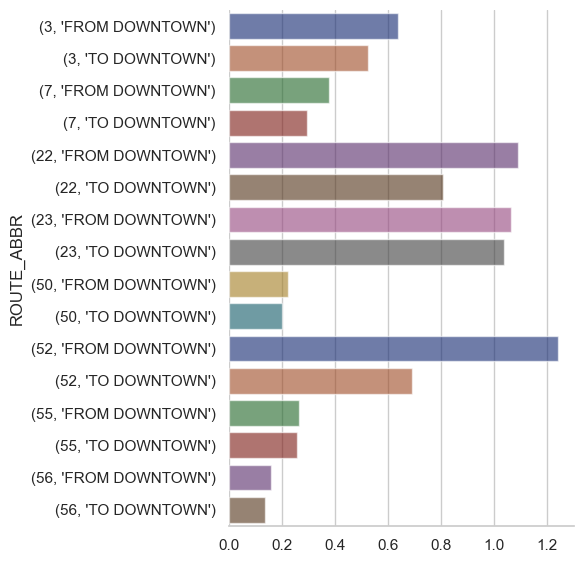

In [120]:
sns.set_theme(style="whitegrid")

#hd_dev = sns.load_dataset('routedir_headway')

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=routedir_headway, kind="bar",
    x="HDWY_DEV", y="ROUTE_ABBR", #hue="ROUTE_DIRECTION_NAME",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "ROUTE_ABBR")
g.legend.set_title("")

<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_DEV'>

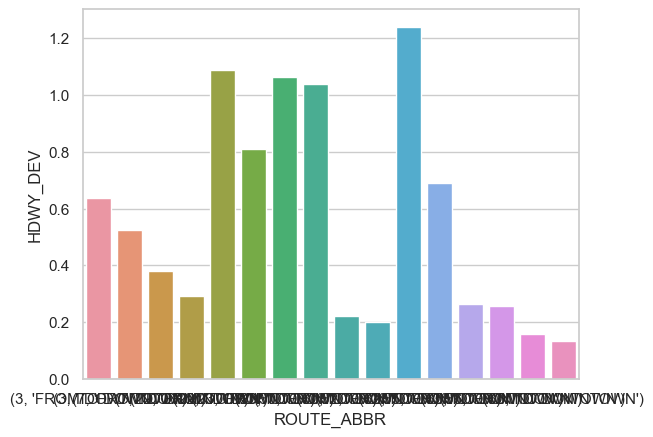

In [118]:
sns.barplot(routedir_headway, x="ROUTE_ABBR", y="HDWY_DEV")

#rotate labels
routeplot2.set_xticklabels(routeplot2.get_xticklabels(), rotation=45)

[Text(0, 0, "(3, 'FROM DOWNTOWN')"),
 Text(1, 0, "(3, 'TO DOWNTOWN')"),
 Text(2, 0, "(7, 'FROM DOWNTOWN')"),
 Text(3, 0, "(7, 'TO DOWNTOWN')"),
 Text(4, 0, "(22, 'FROM DOWNTOWN')"),
 Text(5, 0, "(22, 'TO DOWNTOWN')"),
 Text(6, 0, "(23, 'FROM DOWNTOWN')"),
 Text(7, 0, "(23, 'TO DOWNTOWN')"),
 Text(8, 0, "(50, 'FROM DOWNTOWN')"),
 Text(9, 0, "(50, 'TO DOWNTOWN')"),
 Text(10, 0, "(52, 'FROM DOWNTOWN')"),
 Text(11, 0, "(52, 'TO DOWNTOWN')"),
 Text(12, 0, "(55, 'FROM DOWNTOWN')"),
 Text(13, 0, "(55, 'TO DOWNTOWN')"),
 Text(14, 0, "(56, 'FROM DOWNTOWN')"),
 Text(15, 0, "(56, 'TO DOWNTOWN')")]

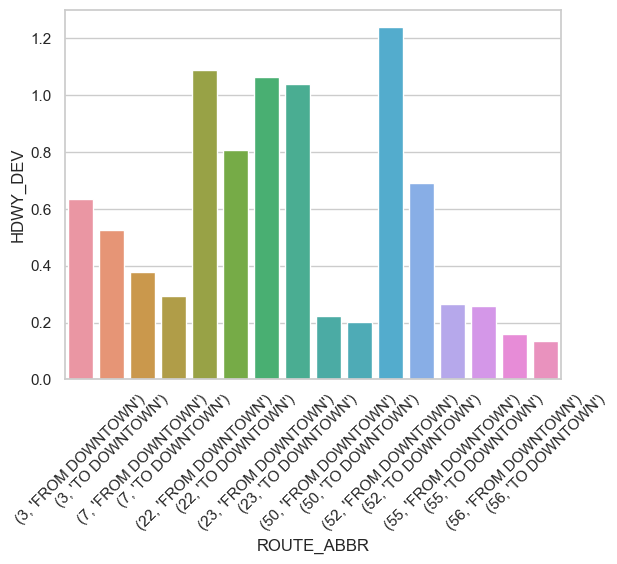

In [116]:
routeplot = sns.barplot(x="ROUTE_ABBR", 
           y="HDWY_DEV", 
          # hue="ROUTE_DIRECTION_NAME", 
           data=routedir_headway) 

#rotate labels
routeplot.set_xticklabels(routeplot.get_xticklabels(), rotation=45)

[Text(0, 0, "(3, 'FROM DOWNTOWN')"),
 Text(1, 0, "(3, 'TO DOWNTOWN')"),
 Text(2, 0, "(7, 'FROM DOWNTOWN')"),
 Text(3, 0, "(7, 'TO DOWNTOWN')"),
 Text(4, 0, "(22, 'FROM DOWNTOWN')"),
 Text(5, 0, "(22, 'TO DOWNTOWN')"),
 Text(6, 0, "(23, 'FROM DOWNTOWN')"),
 Text(7, 0, "(23, 'TO DOWNTOWN')"),
 Text(8, 0, "(50, 'FROM DOWNTOWN')"),
 Text(9, 0, "(50, 'TO DOWNTOWN')"),
 Text(10, 0, "(52, 'FROM DOWNTOWN')"),
 Text(11, 0, "(52, 'TO DOWNTOWN')"),
 Text(12, 0, "(55, 'FROM DOWNTOWN')"),
 Text(13, 0, "(55, 'TO DOWNTOWN')"),
 Text(14, 0, "(56, 'FROM DOWNTOWN')"),
 Text(15, 0, "(56, 'TO DOWNTOWN')")]

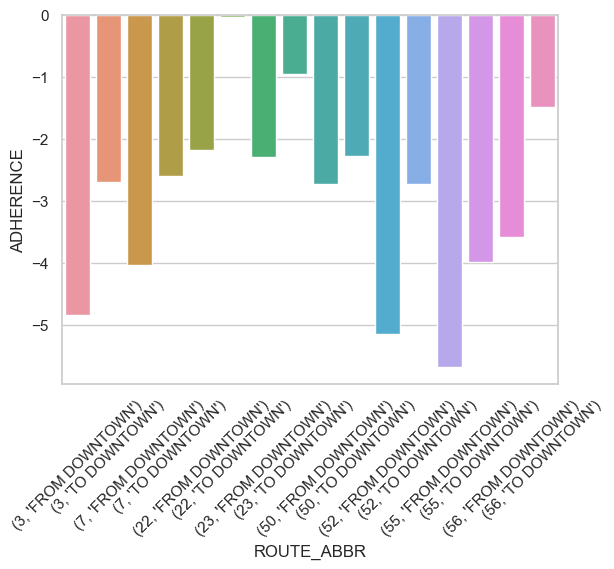

In [117]:
routeplot2 = sns.barplot(x="ROUTE_ABBR", 
           y="ADHERENCE", 
          # hue="ROUTE_DIRECTION_NAME", 
           data=routedir_headway) 

#rotate labels
routeplot2.set_xticklabels(routeplot2.get_xticklabels(), rotation=45)